In [29]:
#n人の中で何人赤旗を上げたのかを調べる。
function sample(n)
    if n == 1
        1
    else
        p = 1
        θ = 0 # 赤なら0，白なら1
        r = [0,0,0,0,0,0,0,0,0,1]
        w = [1,1,1,1,1,1,1,1,1,0]
        for i = 2:n
            if θ == 0 
                t = rand(r)
                if t == 0
                    p += 1
                elseif t ==1
                    θ = 1
                end
            elseif θ == 1 
                t = rand(w)
                if t == 0
                    p += 1
                    θ = 0
                end
            end
        end
        return p
    end
end

sample (generic function with 1 method)

In [54]:
using StatsPlots,Distributions

#理論値
q(n) =0.5+0.5*0.8^(n-1)
heikin(n) = sum(q(i) for i =1:n)
function bunsan(n) 
    k = 0
    for  i = 1:n-1 , j = i+1:n
        k += q(i)*q(j-i+1)
    end
    heikin(n)-heikin(n)^2+2*k
end

#標本平均 
m = 10^5
n = 100
X =[sample(n) for _= 1:m]

@show mean(X);
@show heikin(n);
@show var(X,corrected=true);
@show bunsan(n);



mean(X) = 52.52454
heikin(n) = 52.49999999949071
var(X, corrected = true) = 208.5671234596345
bunsan(n) = 208.7500000045893


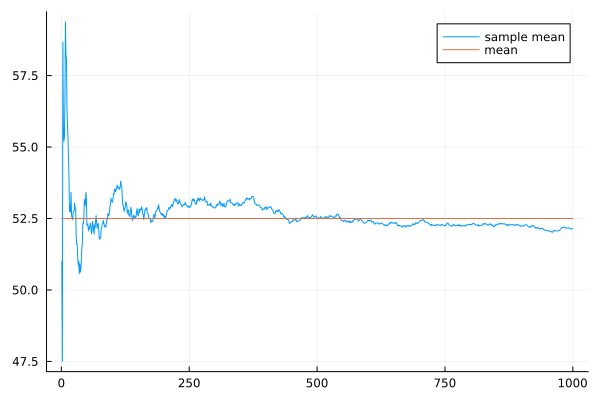

In [72]:
# 大数の法則を確認しておこう！

using StatsPlots,Distributions
m = 10^3
n = 100

X =[sample(n) for _= 1:m]
Z = [mean(X[i] for i =1:k) for k =1:m]

plot(Z,label="sample mean")
plot!(x->heikin(n),label="mean")


mean(A) = 52.61096
std(A, corrected = false) = 14.507754060446436


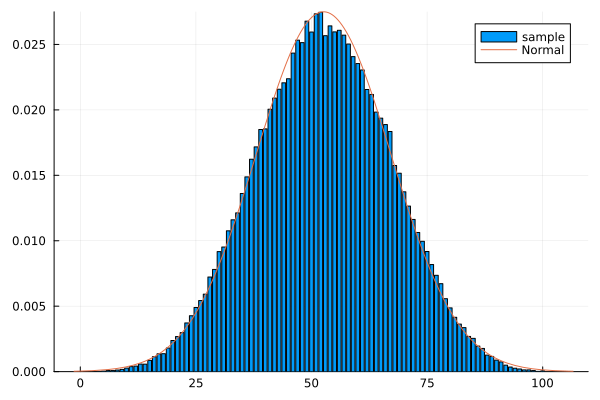

In [75]:
#中心極限定理も見ておこう！
using StatsPlots,Distributions
m , n =10^5,100
A = [sample(n) for _=1:m]
B = [[i,count(x -> x==i ,A)] for i = 1:n]
C = [B[i][2]./m for i=1:n]

bar(C,label="sample")
@show mean(A)
@show std(A,corrected=false)

plot!(Normal(mean(A),std(A,corrected=false)),label="Normal")